<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/3a_2-Car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform visualization and Decision Tree classification of the Car Evaluation data set, as described in Assignment 3, Project Task 1

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

In [74]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # Import Decision Tree Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split function 
#from sklearn import cross_validation, metrics
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report #Import scikit-learn metrics module to calculate accuracy

import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

In [75]:
# store as DataFrame
df = pd.read_csv ('CarDataM.csv')
df = df.dropna() #Remove NAs (just in case, there are non NaN's on this DB)
df.head()

,Buying,Maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Perform data visualization with bar plots, for the various values of the class label.

In [76]:
#sns.catplot(x="doors", y="persons", hue="class", kind="swarm", data=df)

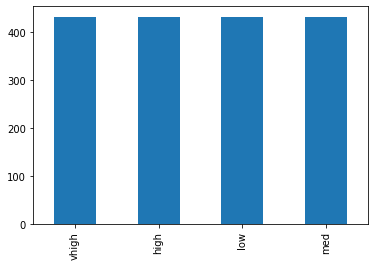

In [77]:
df['Buying'].value_counts().plot(kind='bar')

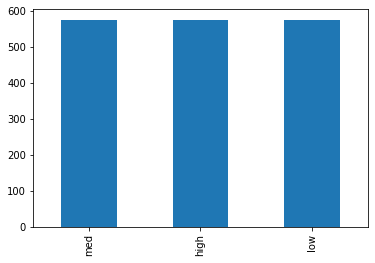

In [78]:
df['safety'].value_counts().plot(kind='bar')

In [79]:
df.describe()

,Buying,Maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,3
top,vhigh,vhigh,5more,2,big,med,unacc
freq,432,432,432,576,576,576,1210


In [80]:
#Plot both scatter Plots and histohram with "pairplot"

### Split the data into train-test set in 70-30 ratio. Train the classifier with the train data set.

### Classification with Entropy

Decision trees like most machine learning algorithms cannot process labeled data values hence the data needs to be encoded as numerical data.

In [81]:
#First, find out all the features with type object in the test data:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Buying', 'Maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


Since the target class labels are strings, we'll have to convert in a format that our classifier would understand. For this we would use the LabelEncoder class of Scikit-Learn module 'preprocessing'. This converts our class labels into [1,2,3,4] where the integers would correspond to the respective class.

In [82]:
#Convert car-class labels to numbers - Not needed - 
#le = preprocessing.LabelEncoder()
#df['class'] = le.fit_transform(df['class'])    
#df.head()         

In [83]:
df['class'].unique()

array(['unacc', 'acc', 'good'], dtype=object)

In [84]:
features = list(df.columns)
features.remove('class')

for f in features:
    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

df.head()    

,Buying,Maint,doors,persons,lug_boot,safety,class
0,0,0,1,1,0,0,unacc
1,0,0,1,1,0,0,unacc
2,0,0,1,1,0,1,unacc
3,0,0,1,1,0,0,unacc
4,0,0,1,1,0,0,unacc


In [85]:
# splitting the dataset into features and target variable
feature_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
X = df.drop(['class'], axis=1) # feature matrix [1]
y = df['class'] # target variable 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [87]:
X_train.head()

,Buying,Maint,doors,persons,lug_boot,safety
1304,0,0,1,1,1,1
327,0,0,1,1,0,0
94,0,0,0,0,0,0
1061,0,1,0,1,1,1
809,1,0,0,0,1,1


In [88]:
!pip install --upgrade category_encoders
import category_encoders as ce

Encode the rest of the variables

In [89]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [90]:
X_train.head()

,Buying,Maint,doors,persons,lug_boot,safety
1304,1,1,1,1,1,1
327,1,1,1,1,2,2
94,1,1,2,2,2,2
1061,1,2,2,1,1,1
809,2,1,2,2,1,1


## max_depth = 3

In [91]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy
m_depth = 3

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth= m_depth , random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [92]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7765


In [93]:
#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [94]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7659


In [95]:
#Check for overfitting and underfitting

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7659
Test set score: 0.7765


[Text(125.55000000000001, 190.26, 'X[3] <= 1.5\nentropy = 1.107\nsamples = 1209\nvalue = [255, 93, 861]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409]'),
 Text(167.4, 135.9, 'X[5] <= 1.5\nentropy = 1.352\nsamples = 800\nvalue = [255, 93, 452]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 1.5\nentropy = 1.498\nsamples = 259\nvalue = [130, 64, 65]'),
 Text(41.85, 27.180000000000007, 'entropy = 1.543\nsamples = 194\nvalue = [84, 64, 46]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.872\nsamples = 65\nvalue = [46, 0, 19]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 1.5\nentropy = 1.06\nsamples = 541\nvalue = [125, 29, 387]'),
 Text(209.25, 27.180000000000007, 'entropy = 1.146\nsamples = 399\nvalue = [97, 29, 273]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.716\nsamples = 142\nvalue = [28, 0, 114]')]

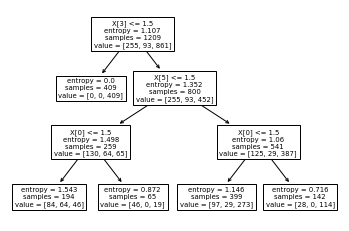

In [96]:
#Visualize the decision tree
#plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

## max_depth = 5

Model accuracy score with criterion entropy: 0.8021
Training-set accuracy score: 0.7865
Training set score: 0.7865
Test set score: 0.8021


[Text(133.92000000000002, 190.26, 'X[5] <= 1.5\nentropy = 1.123\nsamples = 1157\nvalue = [255, 89, 813]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 2.5\nentropy = 1.36\nsamples = 771\nvalue = [255, 89, 427]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.47\nsamples = 525\nvalue = [255, 89, 181]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 1.411\nsamples = 254\nvalue = [131, 89, 34]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246]')]

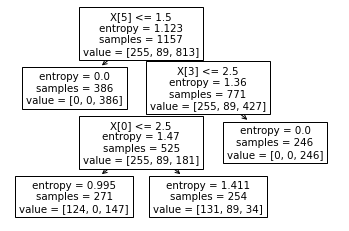

In [98]:
# instantiate the DecisionTreeClassifier model with criterion entropy
m_depth = 3

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth= m_depth , random_state=0)
# fit the model
clf_en.fit(X_train, y_train)


#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#Check for overfitting and underfitting

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


#Visualize the decision tree
#plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 


### Classification with Gini Index

Model accuracy score with criterion gini index: 0.8021


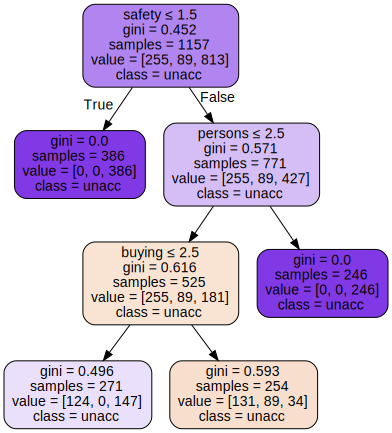

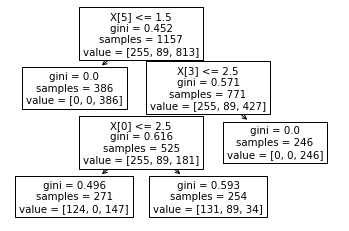

In [97]:

df = pd.read_csv ('CarDataM.csv') # read_csv is a pandas function utilized to read csv files and do operations on it 

# renaming column names
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"] 
df.columns = col_names # assigning the above column names to the dataframe’s current columns

df.shape # viewing dataset’s dimension
df.head(5) # previewing the first 5 rows of the dataset

# splitting the dataset into features and target variable
feature_cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
X = df.drop(['class'], axis=1) # feature matrix [1]
y = df['class'] # target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # 67% training and 33% test // found out by 1 - test_size = 1 - 0.33 = 0.67 -> 67%
X_train.shape, X_test.shape

# decision trees like most machine learning algorithms cannot process labeled data values hence the data is encoded as numerical data is easily handled by this algorithm. A stackoverflow question expands on this topic.

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

X_test.head()

# Create Decision Tree classifier object ; clf refers to classifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0) 
clf_gini.fit(X_train, y_train) 
y_pred_gini = clf_gini.predict(X_test) 

# determining model accuracy i.e. how often is the classifier correct?
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

#plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

import graphviz # graphviz takes description of graphs and data and constructs diagrams based off of that information
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data) 
graph 
